In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import networkx as nx
import time
import seaborn as sns
import re
import math
sns.set_style("whitegrid")
#sns.set(style="darkgrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 16,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
          'axes.labelsize': 18,
          'axes.titlesize': 20,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18}
plt.rcParams.update(params)
ing_fmt = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("netflix_titles copy.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Usaremos la función 'missingno()' para visualizar los datos perdidos

<AxesSubplot: >

Text(0.5, 1.0, 'Valores Nulos')

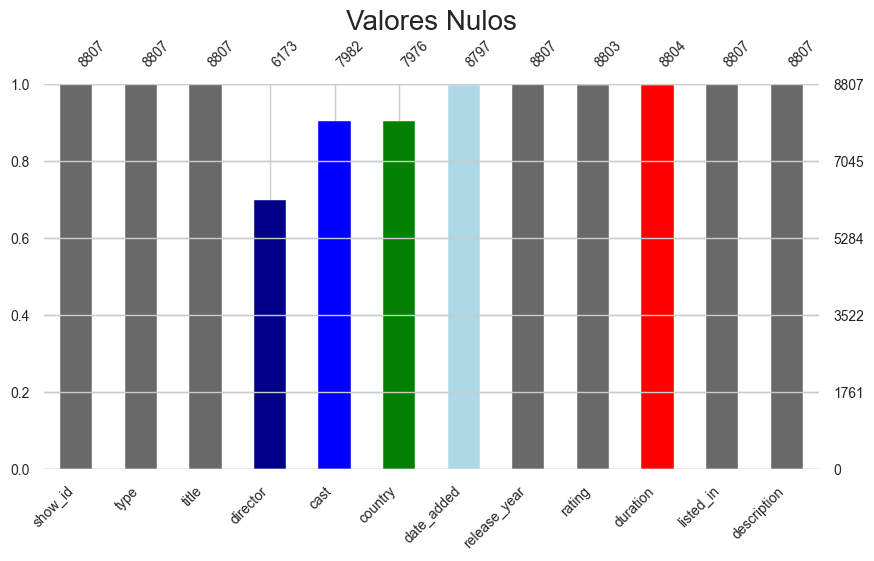

In [17]:
# Visualizando los valores nulos
import missingno # visualizando los datos perdidos
color = ['dimgrey', 'dimgrey', 'dimgrey','darkblue', 'blue', 'green', 'lightblue', 'dimgrey', 'dimgrey', 'red', 'dimgrey', 'dimgrey']
missingno.bar(df, fontsize=10, color=color,figsize=(10,5))
plt.title('Valores Nulos', fontsize = 20)


Faltan valores en la columna director, elenco, pais y fecha de adición

No podemos completar aleatoriamente los valores que faltan en las columnas de director y elenco, por los que podemos eliminarlos.

Para un número minimo de valores faltantes en country y date_added, rating, podemos completarlos usando mode ( valor más común) y mean.


In [18]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) 
df['duration'] = df['duration'].fillna(df['duration'].mode()[0]) 

In [19]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

elimnamos la columna 'cast' y 'director'

In [20]:
df = df.dropna(how = 'any', subset=['cast', 'director'])

In [21]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 2 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5700 non-null   object
 1   type          5700 non-null   object
 2   title         5700 non-null   object
 3   director      5700 non-null   object
 4   cast          5700 non-null   object
 5   country       5700 non-null   object
 6   date_added    5700 non-null   object
 7   release_year  5700 non-null   int64 
 8   rating        5700 non-null   object
 9   duration      5700 non-null   object
 10  listed_in     5700 non-null   object
 11  description   5700 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.9+ KB


Podemos ver que ya no tenemos valores perdidos, ahora podemos continuar con nuestro análisis

### 4.4 Limpiando los datos

In [23]:
# Renombrando la columna 'listed_in' como Género
df = df.rename(columns={"listed_in":"Genero"})
df['Genero'] = df['Genero'].apply(lambda x: x.split(",")[0])
df['Genero'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genero, dtype: object

Vamos a agregar una nueva columna "year_add" que es el año de la película

In [24]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [25]:
print(df['year_add'].unique())

['2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012'
 '2011' '2009' '2008' '2010']


Vamos a agregar una nueva columna "month_add" que son los meses

In [26]:
df["month_add"] = df["date_added"].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [27]:
print(df['month_add'].unique())

['September' 'August' 'July' 'June' 'May' 'April' 'March' 'February'
 'January' 'December' 'November' 'October' '']


Agregamos una nueva columna 'country_main' que es el país principal

In [28]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

Análisis de la columna 'type'

In [29]:
count = df['type'].value_counts()
percent = 100 * df['type'].value_counts(normalize=True)

In [30]:
pd.DataFrame({'count':count, 'percent': percent.round(1)})

,count,percent
Movie,5522,96.9
TV Show,178,3.1


Análisis de la columna 'ratings'

In [31]:
df['rating'].unique().shape

(17,)

In [32]:
count = df['rating'].value_counts()
percent = 100*df["rating"].value_counts(normalize=True)
pd.DataFrame({'count':count,'percent':percent.round(1)})

,count,percent
TV-MA,1940,34.0
TV-14,1329,23.3
R,789,13.8
PG-13,477,8.4
TV-PG,456,8.0
PG,279,4.9
TV-Y7,123,2.2
TV-Y,102,1.8
TV-G,96,1.7
NR,58,1.0


Ahora vamos a crear dos nuevos marcos de datos, uno con colecciones de películas y otros con colecciones de programas de TV:

*movie_df

*tv_df

In [33]:
print(df['type'].unique())

['TV Show' 'Movie']


In [34]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [35]:
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States


# 5. Análisis Exploratorio de Datos (EDA)

In [36]:
fig = px.histogram(df,
                    x='type',
                    template='plotly_dark',
                    color_discrete_sequence=['forestgreen', 'darkorange','gold','deeppink'],
                    title='Tipo de Programas')
fig.update_layout(bargap=0.1)
fig.show(0);

In [37]:
#sns.set(style='darkgrid')
#sns.countplot(x='type', data=df, palette='dark')

### Analizando el rating de Movies & TV Shows

In [38]:
print(df['rating'].unique())

['TV-MA' 'PG' 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR']


In [39]:
movie_df['rating'].value_counts().index[0:15]

Index(['TV-MA', 'TV-14', 'R', 'PG-13', 'TV-PG', 'PG', 'TV-Y7', 'TV-Y', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17', '74 min'],
      dtype='object')

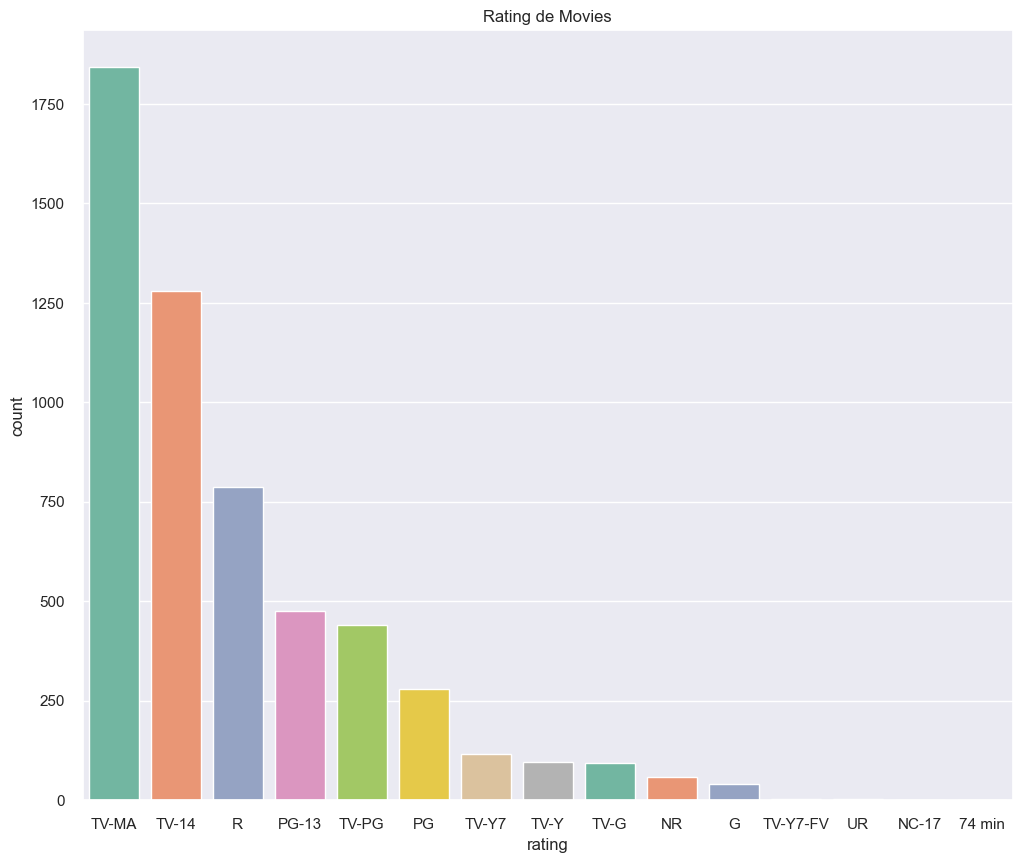

In [40]:
# Movies ratings
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x='rating', data = movie_df, palette='Set2',order=movie_df['rating'].value_counts().index[0:15]);
plt.title('Rating de Movies');

El mayor recuento de peliculas se realiza con la clasificación 'TV-MA', 'TV-14' es una clasificación asignada por las Pautas para padres de TV a un programa de televisión que fue diseñado solo para audiencias maduras.

El segundo más grande es 'TV-14', que significa contendio que puede ser inapropiado para niños menores de 14 años

La tercera más grande es la muy popular clasificación 'R'. Una película con clasificación R es una pelúcula que se ha evaluado con material que puede no ser adecuado para niños menores de 17 años

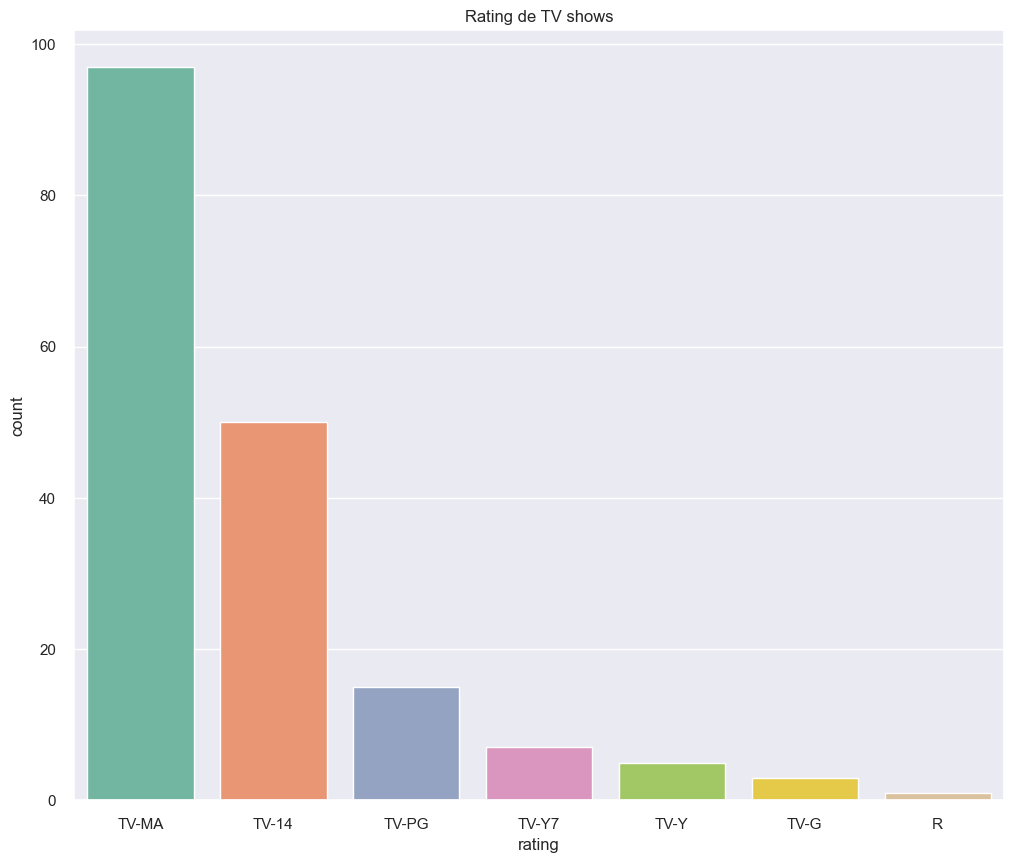

In [41]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x='rating', data=tv_df, palette='Set2', order=tv_df['rating'].value_counts().index[0:15]);
plt.title('Rating de TV shows');

* La mayoría de los programas de televisión tienen clasificaciones 'TV-14', lo que significa que el contenido puede ser inapropiado para niños menores de 14 años.

* El segundo recuento más alto de clasificación en programas de televisión es 'TV-MA', para el cual el contenido es solo para audiencias madures.

* Los programas de televisón tiene la menor cantidad de cantidad con clasificación 'R'.

** Análisis de contenido por año **

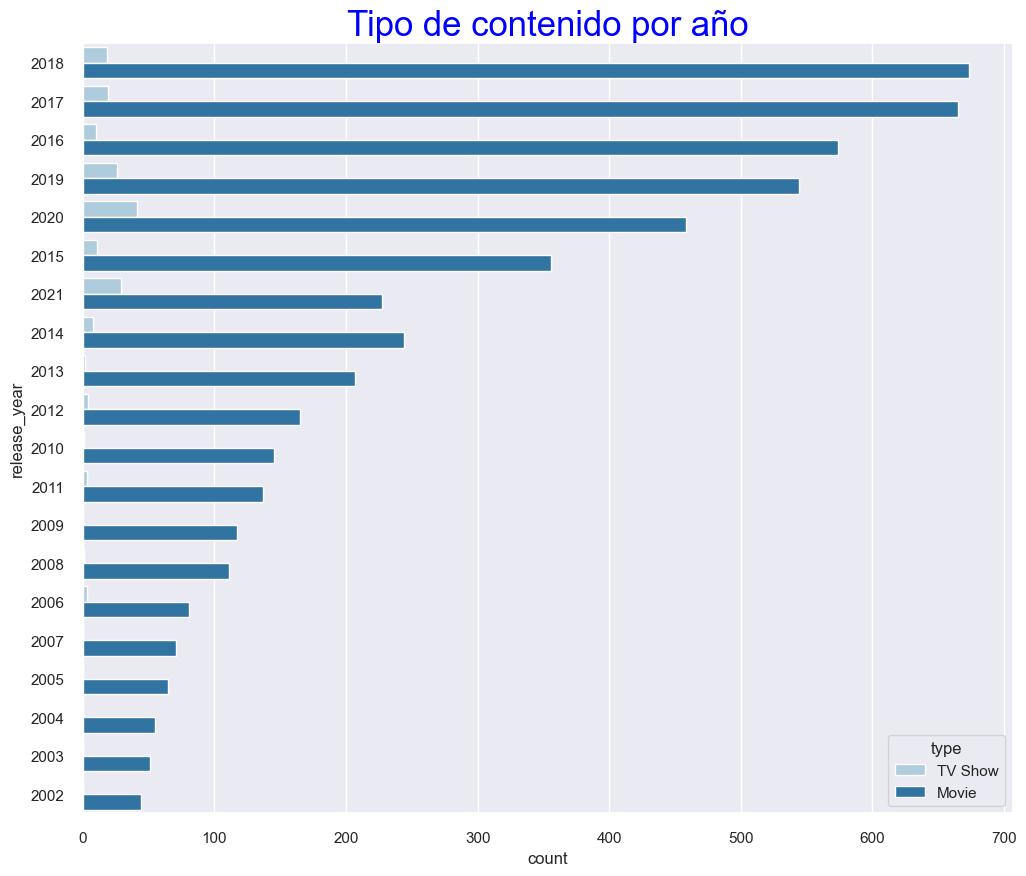

In [42]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y ='release_year', data = df, palette = 'Paired', order = df['release_year'].value_counts().index[0:20], hue = df['type']);
plt.title('Tipo de contenido por año', fontsize = 25, color = 'blue');

### Análisis de duración de movies

In [43]:
movie_df['duration'] = movie_df['duration'].str.replace(' min','')
movie_df['duration'] = movie_df['duration'].astype(str).astype(int)
movie_df['duration']

ValueError: invalid literal for int() with base 10: '1 Season'

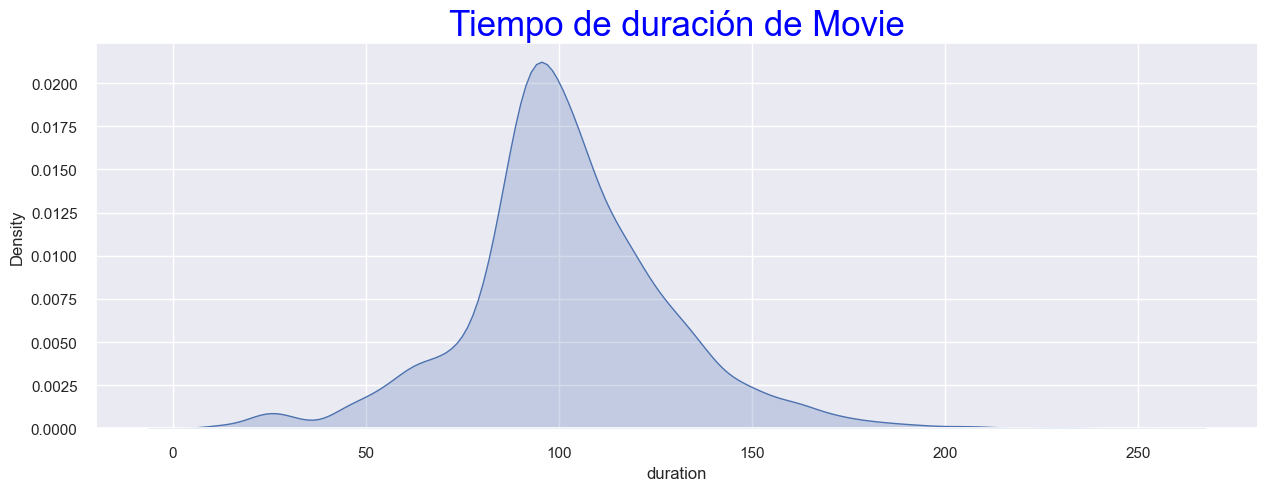

In [ ]:
sns.set(style='darkgrid')
sns.kdeplot(data=movie_df['duration'], shade=True);
plt.title('Tiempo de duración de Movie', fontsize = 25, color = 'blue');

### Tendencia de duración de Movies

In [ ]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year.head(5)

,duration
release_year,
1942,18.0
1944,76.0
1945,63.0
1946,58.0
1947,42.0


In [ ]:
duration_year.index.unique()

Int64Index([1942, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='release_year')

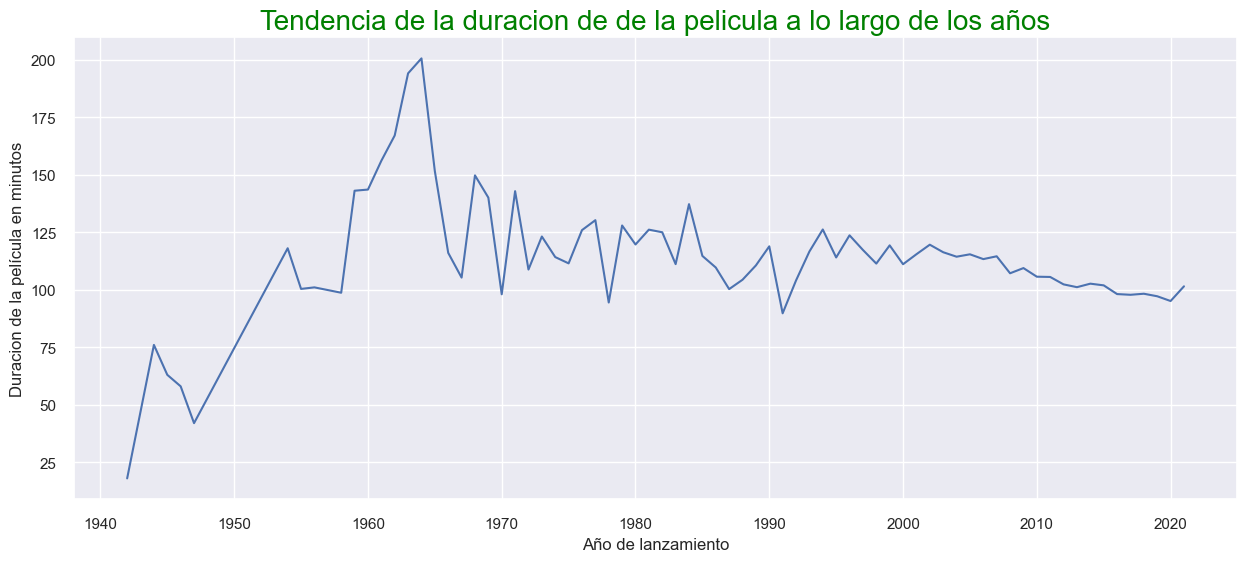

In [ ]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.lineplot(x=duration_year.index, y=duration_year.duration.values)
#plt.box(on=None)
plt.ylabel('Duracion de la película en minutos');
plt.xlabel('Año de lanzamiento');
plt.title('Tendencia de la duracion de de la pelicula a lo largo de los años', fontsize = 20,color = 'Green');


* En los años **1960** a **1965**,laduración d las películas era de 200 minutos, despues de 1965 la duración se volvió comparativamente más corta.

* Desde el año **1980**,podemos ver una tendencia constante en la duración de las películas, cuyo tiempo de duracón es de entre 100 y 150 minutos

### **Análisis de TV Show con más temporadas**

In [ ]:
aux = tv_df

In [ ]:
aux[['a', 'b']] = aux['duration'].str.split(' ', expand=True)

In [ ]:
aux['b'].unique()

array(['Season', 'Seasons'], dtype=object)

In [ ]:
tv_df['duration'] = tv_df['duration'].str.replace(' Season', '')
tv_df['duration'] = tv_df['duration'].str.replace(' Seasons', '')
tv_df['duration'] = tv_df['duration'].str.replace('s', '')
tv_df['duration'] = tv_df['duration'].astype(str).astype(int)
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int32

Extraiga los títulos de losprogramas de televisión y su número de temporadas

In [ ]:
# Extraxt the columns from tv_df
columns = ['title', 'duration']
tv_shows =tv_df[columns]
tv_shows.head(5)

,title,duration
2,Ganglands,1
5,Midnight Mass,1
8,The Great British Baking Show,9
11,Bangkok Breaking,1
47,The Smart Money Woman,1


In [ ]:
# Sort th dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration', ascending=False)
#tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<Figure size 1000x600 with 0 Axes>

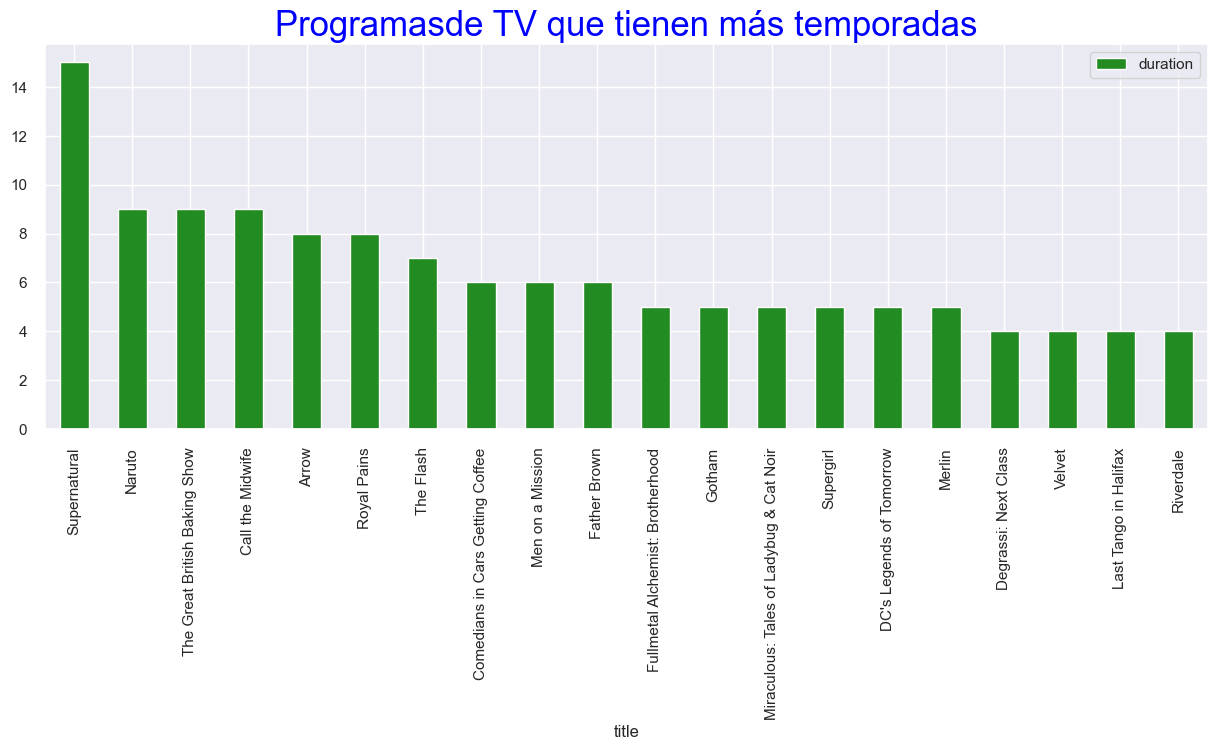

In [ ]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar', x='title', y='duration', color='forestgreen')
plt.title('Programasde TV que tienen más temporadas', fontsize = 25, color = 'blue');

**Sobrenatural** y **Naruto** tienen la mayor cantidad de tmporadas

<Figure size 800x600 with 0 Axes>

(-1.1085576970422604,
 1.2797140347599374,
 -1.21002657826846,
 1.2136339530899023)

Text(0.5, 1.0, 'Temporadas disponibles en Netflix')

NameError: name 'texts' is not defined

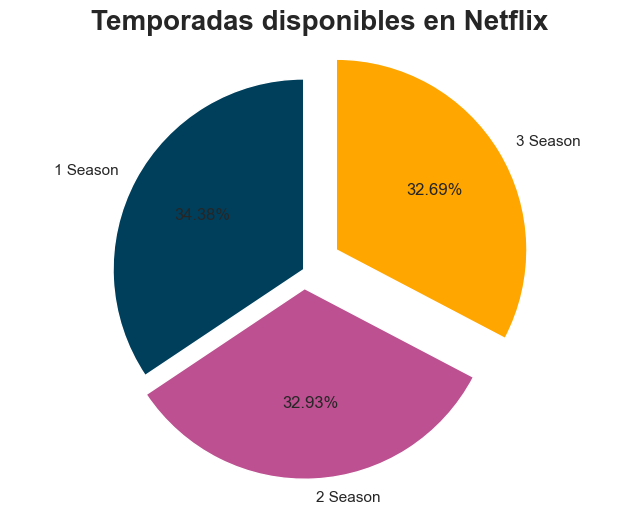

In [ ]:
# TV SHOWS y sus temporadas
plt.figure(figsize=(8,6));
labels=['1 Season', '2 Season', '3 Season'];
_, _, text = plt.pie(df.duration.value_counts()[:3],labels=labels, autopct='%1.2f%%', startangle=90,
                     explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090','#ffa600'])
plt.axis('equal');
plt.title('Temporadas disponibles en Netflix', fontsize=20, fontweight='bold');

for text in texts:
    text.set_color('white');

De la tabla que podemos analizar, 35.04% Programas de TV tienen solo 1 temporada, 32.48% Programas de TV tienen 2 temporadasy 32.48% Porgramas d TV tienen 3 temporadas dsponibles

**Pases en la cima para la creación de contenido de películas**

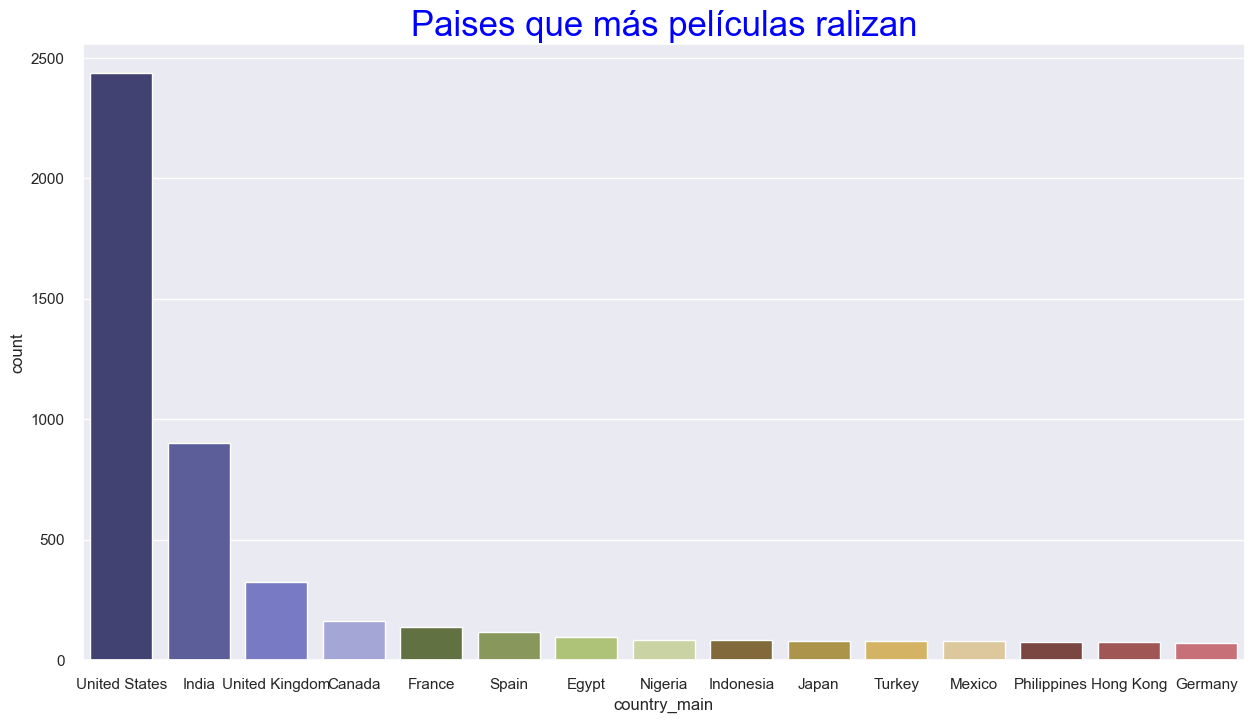

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x='country_main', data=movie_df, palette='tab20b', order=movie_df['country_main'].value_counts().index[0:15]);
plt.title('Paises que más películas ralizan', fontsize= 25, color = 'blue');


**Paises que más realzan TV Shows**

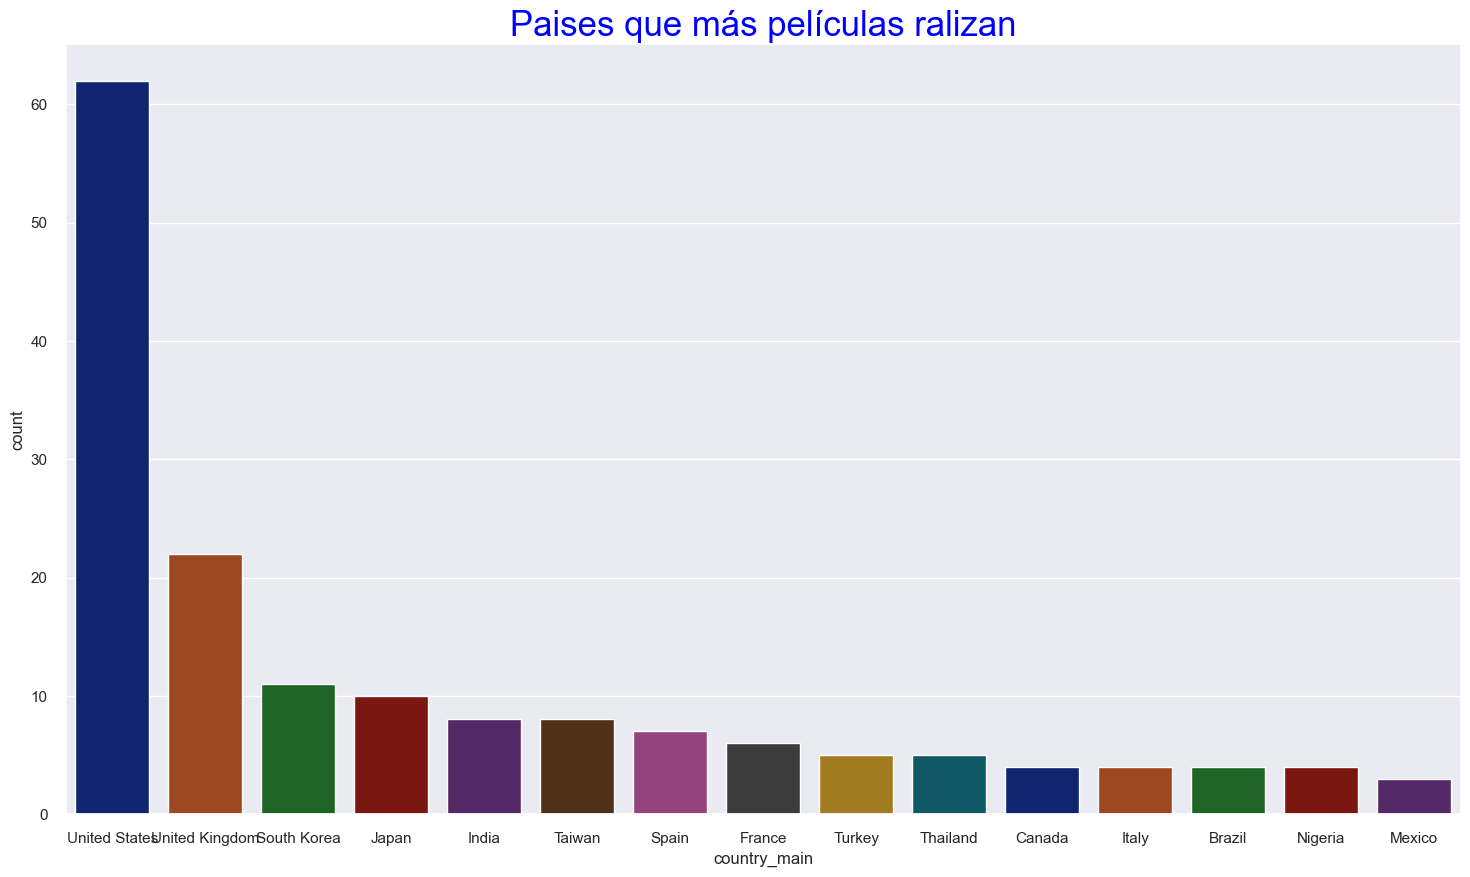

In [ ]:
plt.figure(figsize=(18,10))
sns.set(style="darkgrid")
sns.countplot(x='country_main', data=tv_df, palette='dark', order=tv_df['country_main'].value_counts().index[0:15]);
plt.title('Paises que más películas ralizan', fontsize= 25, color = 'blue');

**Comprender que contenido está disponible en difrentes países**

In [ ]:
# Diferente Genero de paises
columns = ['Genero', 'country_main']
gen_country = df[columns]
gen_country.head()

,Genero,country_main
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom


### **Número de programas lanzados por año**

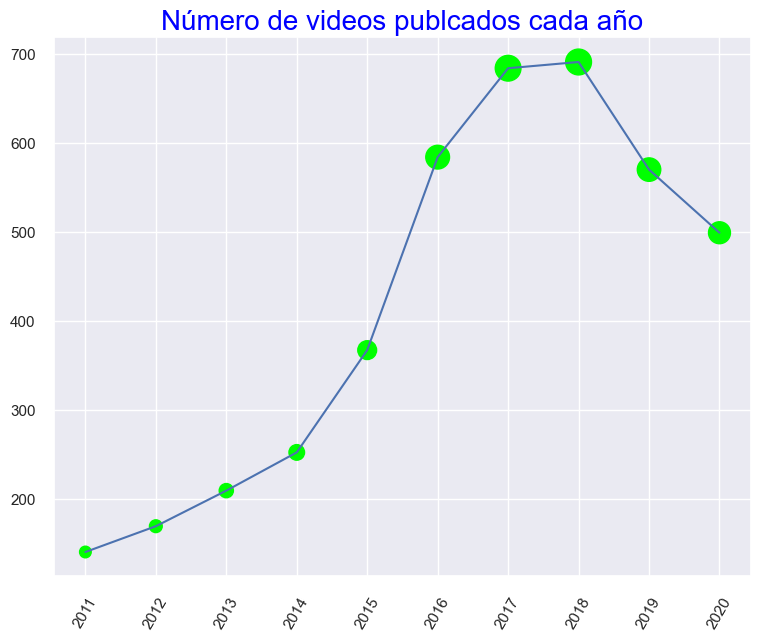

In [ ]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)
plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='lime');
#plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Número de videos publcados cada año', color='blue', fontsize= 20);

Hay una tendencia creciente a partir del año 2011 y la tendencia comienza  escalar con una caida en los recuento de películas posteriors a 2018.

Muestra que la mayoría de los videos se lanzaron en 2018 comparativamente más que en 2019 y 2010

**Directores con mayor número de películas producidas**

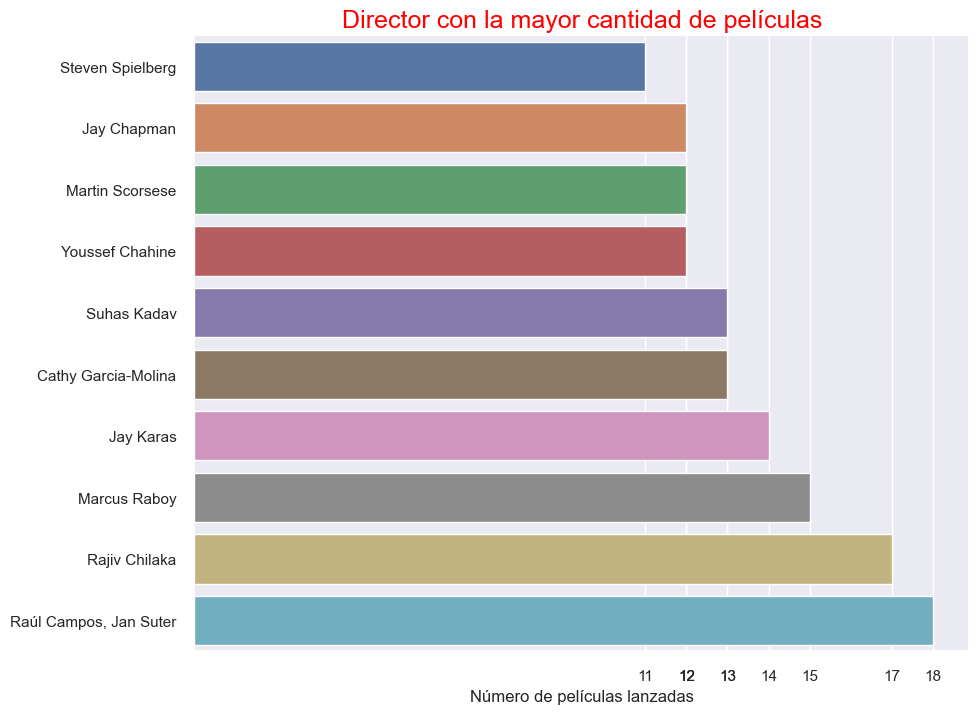

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director con la mayor cantidad de películas', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Número de películas lanzadas');

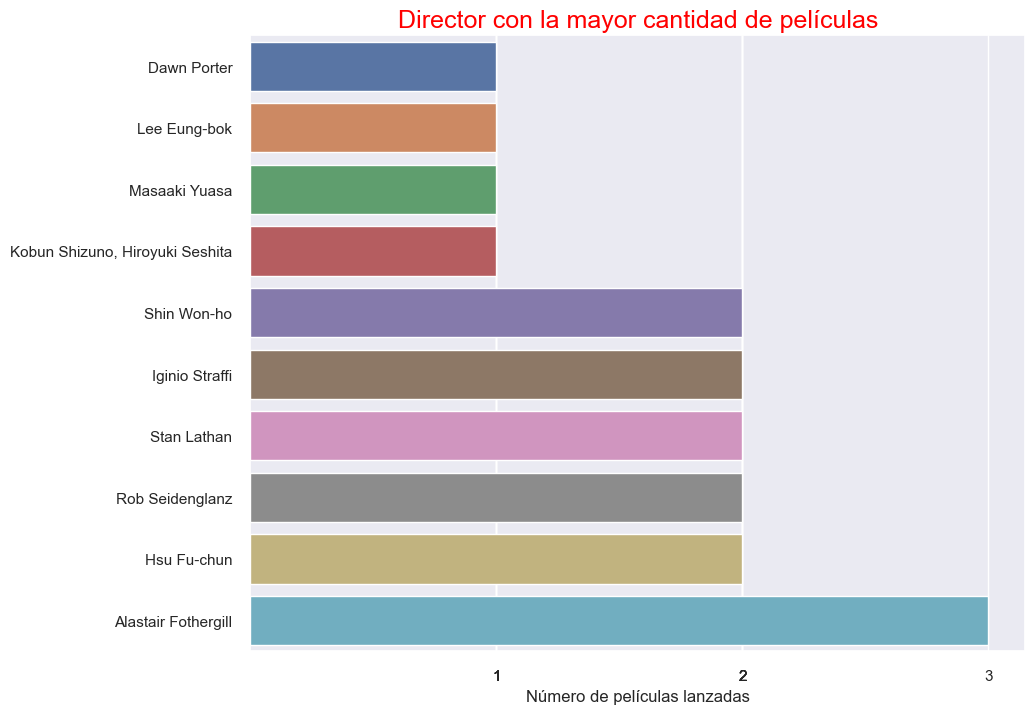

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director con la mayor cantidad de películas', color='red', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Número de películas lanzadas');

### **Géneros más populares en Netflix**

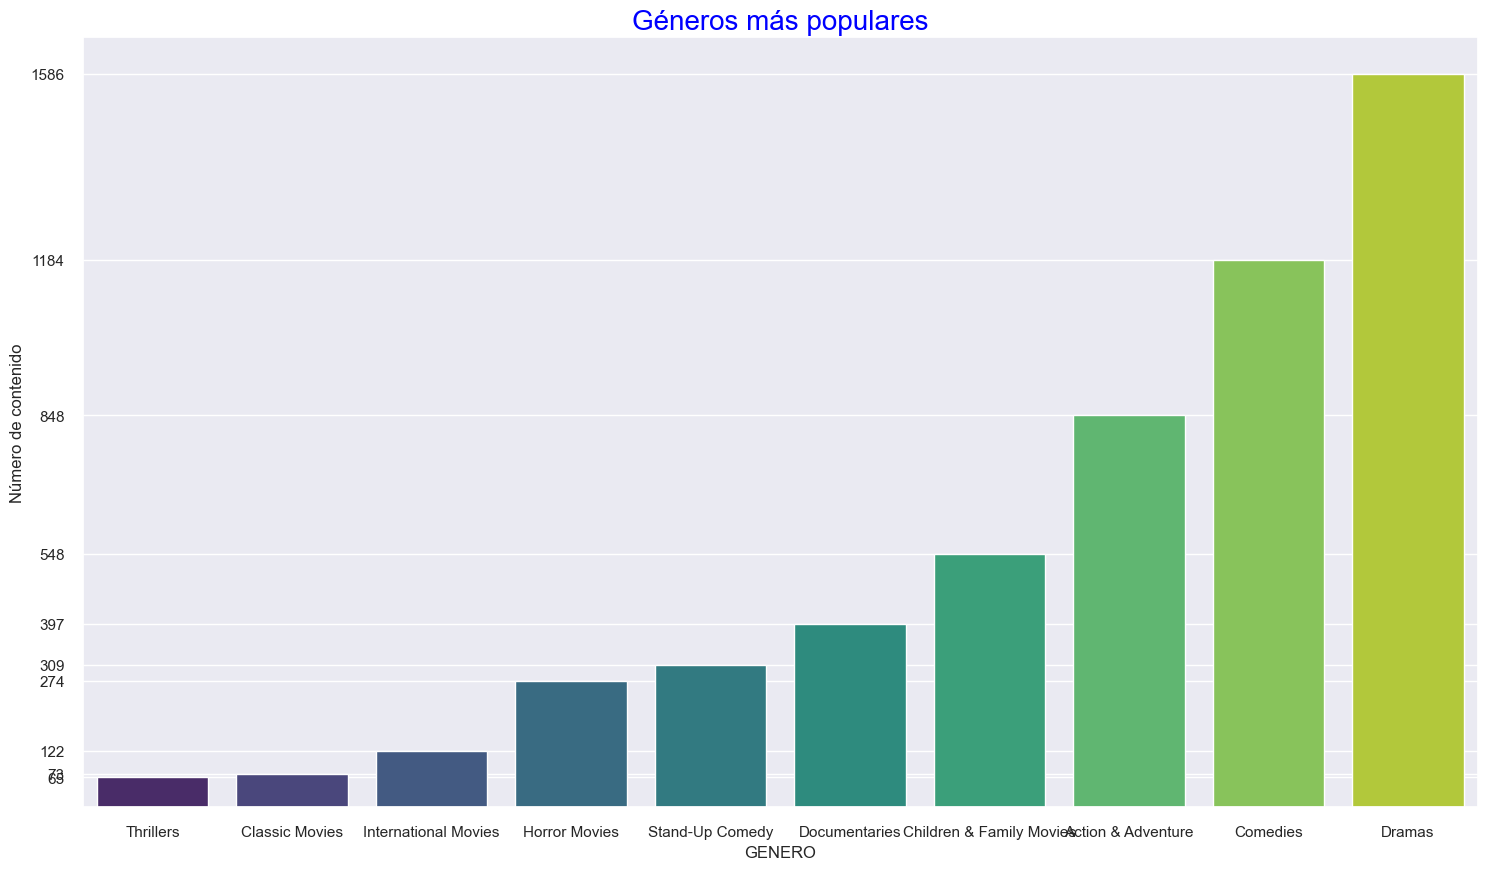

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.Genero.value_counts()[:10].sort_values().index, y=df.Genero.value_counts()[:10].sort_values().values, palette='viridis');
plt.title('Géneros más populares', color= 'Blue', fontsize= 20)
plt.yticks(df.Genero.value_counts()[:10].sort_values().values);
plt.xlabel('GENERO');
plt.ylabel('Número de contenido');

### **Top Actor/Actresses en Netflix**

min 19:32

In [ ]:
plt.figure(figsize=(18,14))
sns.barplot(y=df.cast.value_counts()[:15].sort_values.index, x=df.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r');
plt.title('Mejor actor / actices en Netfilx', color = 'purple', fontsize = 30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

AttributeError: 'function' object has no attribute 'index'

<Figure size 1800x1400 with 0 Axes>

### **El mejor mes para que los directores publiquen contenido**
Podemos analizar los meses en los que se agrega menor cantidad de contenidos, que meses pueden ser mejores para que los directores publiquen su contenido para su mejor atención a la audienca

min 20:02

# **Sistema de Recomendación**

### **Contenido basado en filtro**
para este sistema de recomendación, el contenido de la película (reparto, descripción,director, género, etc.) se utiliza para encontrar su similitud con otras películas. Entonces se recomiendan las películas que tienen más posibilidades de ser similares.

### ** Visualización de la descripción basada en Recomendación**
Calcularemos las puntuaciones de similitud para todas las películas en función de las descripciones de la trama y recomendarmos películas en función de esa puntuación de similitud. La descripción de la parcela se proporciona en la característica descripción de nuestro conjunto de datos.

In [4]:
df['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

Necesitamos convertir el ventor de palabra de cada descripción general. Calcularemos los vectores de frecuencia de término de documnto inverso (TF-IDF) para cada descripción. La importancia general de cada palabra para los documentos en los que aparecen es igual a TF*IDF Esto se hace para reducir la importancia de las palabras que aparecen con frecuencia en las descripciones generales de la trama y por lo tanto, su importancia en el cálculo de la puntuación final de similitud.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Defina un objeto vectorizador TF-IDF. Elimné todas las palabras vacías en ingles,como 'the', 'a'"Material de apoyo.md"
tfidf = TfidfVectorizer(stop_words='english')

In [6]:
# Reemplazar NaN con una cadena vacía
df['description'] = df['description'].fillna('')

# Contruya lamatriz TF_IDF requerida ajustando y transformando los datos
tfidf_matrix = tfidf.fit_transform(df['description'])

# Salida de la forma de tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

Dado que hemos utilizado el vectorizador TF-IDF, el cálculo del producto escalar nos dará directamente la puntuación de similitud del coseno. Por lo tanto usaremos **linear_kernel()** de sklearn en lugar de 

In [7]:
# Import linear_kernel
from sklearn.metrics.pairwise import laplacian_kernel

# COmpute the cosine similarity matrix
cosine_sim = laplacian_kernel(tfidf_matrix, tfidf_matrix)

Necesitamos un mecanismo para identificar el índice de una película en nuestro DataFrame de metadatos, dado su título 

In [8]:
# Construya un mapa inverso de índices y títulos de películas.
indices =pd.Series(df.index, index=df['title']).drop_duplicates()

Deinamos una función que tome el título de una película como entrada y genere una lista de las 10 películas más similares

In [9]:
def get_recomendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Obtenga las puntuaciones de similitud por partes de todas las películas con esapelícula
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordene las películas según las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key= lambda x: x[1], reverse=True)

    # Obtén las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]

    # Obtenga los índices de películas
    movie_indices = [i[0] for i in sim_scores]

    # Devuelve el top 10 de películas más similares
    return df['title'].iloc[movie_indices]

In [10]:
get_recomendations('Naruto')

59                   Naruto Shippuden: The Movie
8165                                      Teresa
6291                      Beyblade: Metal Fusion
56      Naruto Shippuden the Movie: Blood Prison
7559             Naruto Shippuden : Blood Prison
3007                           WHAT DID JACK DO?
7280                                      Lechmi
4534               Super Monsters Save Halloween
1889                              Pat a Pat Como
7423                                    Max Rose
Name: title, dtype: object

In [11]:
get_recomendations('PK')

8165                                          Teresa
4221                           Merku Thodarchi Malai
3007                               WHAT DID JACK DO?
3714                                        Unbroken
906     Have You Ever Seen Fireflies? - Theatre Play
4569                        Harishchandrachi Factory
1239                                          Parker
8088                                    Step Outside
1885                     Bad Boy Billionaires: India
2607                                     Love Is War
Name: title, dtype: object

Estas son recomendaciones completamente basads en la trama, podemos ver que no son precisos, podemos intentar  agregar más métricas para mejorar el rendimiento del modelo

### **Multiple metrica (Genero, cast, director) para nuestro sistema de recomendación**
De las características de género, reparto y director, necesitamos extraer los tres actores más importranntes, el director y los géneros asociados con esa película

In [44]:
features = ['Genero', 'director', 'cast', 'description', 'title']
filters = df[features]

In [45]:
# Cleaning the data by making all the words in lower case.
def clean_data(x):
    return str.lower(x.replace(" ", ""))

In [46]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)

filters.head()

,Genero,director,cast,description,title
2,crimetvshows,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands
5,tvdramas,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...",thearrivalofacharismaticyoungpriestbringsglori...,midnightmass
6,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",equestria'sdivided.butabright-eyedherobelieves...,mylittlepony:anewgeneration
7,dramas,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","onaphotoshootinghana,anamericanmodelslipsbacki...",sankofa
8,britishtvshows,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood",atalentedbatchofamateurbakersfaceoffina10-week...,thegreatbritishbakingshow


Ahora podmos crear una "sopa de metadatos", que es una cadena qu contiene todos los metadatos que queremos alimentar a nuestro vectorizador

In [47]:
def creature_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' + x['Genero'] + ' ' + x['description']

In [48]:
filters['soup'] = filters.apply(creature_soup, axis=1)

Los siguientes pasos son los mismos que hicimos con nuestro recomendador basado en la descripción de la trama. Una diferencia importante es que usamos CountVectorzer() en lugar de TF-IDF

In [49]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matirx = count.fit_transform(filters['soup'])

In [51]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matirx, count_matirx)

In [52]:
filters.head()

,Genero,director,cast,description,title,soup
2,crimetvshows,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands,"julienleclercq samibouajila,tracygotoas,samuel..."
5,tvdramas,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...",thearrivalofacharismaticyoungpriestbringsglori...,midnightmass,"mikeflanagan katesiegel,zachgilford,hamishlink..."
6,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",equestria'sdivided.butabright-eyedherobelieves...,mylittlepony:anewgeneration,"robertcullen,joséluisucha vanessahudgens,kimik..."
7,dramas,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","onaphotoshootinghana,anamericanmodelslipsbacki...",sankofa,"hailegerima kofighanaba,oyafunmikeogunlano,ale..."
8,britishtvshows,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood",atalentedbatchofamateurbakersfaceoffina10-week...,thegreatbritishbakingshow,"andydevonshire melgiedroyc,sueperkins,maryberr..."


In [53]:
# Restablezca el índice de nuestro DataFrame principal y construya el mapeo inverso como antes
filters = filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [56]:
def get_recomendations_new(title, cosine_sim=cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]

    # Obtenga las puntuaciones de similitud por partes de todas las películas con esa película
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ordene las películas según las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtén las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]

    # Obtenga los índices de películas
    movie_indices = [i[0] for i in sim_scores]

    # Devuelve el top 10 de películas más similares
    return df['title'].iloc[movie_indices] 

In [58]:
get_recomendations_new('PK', cosine_sim2)

UnboundLocalError: local variable 'sim_scores' referenced before assignment

In [59]:
get_recomendations_new('Arrow',cosine_sim2)

UnboundLocalError: local variable 'sim_scores' referenced before assignment